In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

import pandas as pd

np.random.seed(0)

plt.style.use('ggplot')

"""Materials from sklearn reference, course notes, and wikipedia pages for respective algs"""
"""if extra time - https://github.com/pinecone-io/examples/blob/master/learn/analytics-and-ml/time-series/time-series-stocks-pattern-example.ipynb"""

'if extra time - https://github.com/pinecone-io/examples/blob/master/learn/analytics-and-ml/time-series/time-series-stocks-pattern-example.ipynb'

# k-means 

Objective
$$
\underset{\mathbf{S}}{\arg \min } \sum_{i=1}^{k} \sum_{\mathbf{x} \in S_{i}}\left\|\mathbf{x}-\boldsymbol{\mu}_{i}\right\|^{2}
$$

Equivalently, minize the squared sum of distances between points in a cluster or between points and the cluster's center of mass. This problem is, in general, **computationally intractable.**

To solve this, we use a greedy heuristic based on Lloyd's algorithm. Stated simply, we'll generate a number of starting clusters centers (and there are different ways to cleverly do this), and then, until convergence, do


1.   Assign each cluster to the nearest center
2.   Recalculate cluster centers


Worst-case this is very slow, but in practice it converges quickly. k-means assumes spherical clusters of roughly equal size and density. In practice, it works well on real data.



# Agglomerative Clustering

A general clustering procedure that involves a distance metric and a linkage criterion. 

For each iteration, merge competing clusters based on the linkage criteria to produce a tree. Then, select a level based on some criteria or the number of clusters you were hoping to achieve. 


# DBSCAN

A density-based clustering method, DBSCAN attempts to link points found closely together in space. DBSCAN also marks and excludes outliers. The algorithm runs with three steps:



1.   Find all within-ϵ neihbors for every point. Identify points with more than the min # neighbors (hyperparameter) and call these core.
2.   Find the connected components of points in the core. 
3. Assign each non-core point to the nearest cluster if within-ϵ. 







# Compare three clustering algorithms

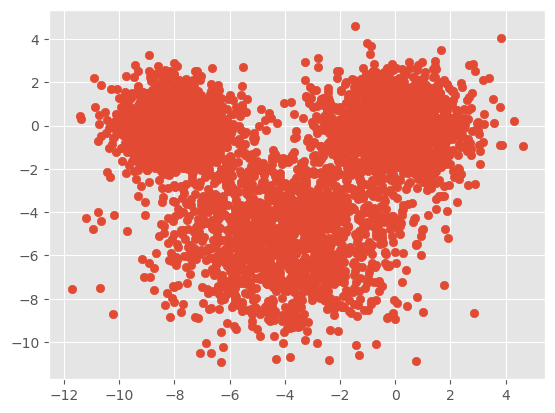

In [18]:
n_samples = 1500
D1 = np.random.multivariate_normal([-8,0], np.eye(2), n_samples)
D2 = np.random.multivariate_normal([0,0], 1.5*np.eye(2), n_samples)
D3 = np.random.multivariate_normal([-4,-5], 5*np.eye(2), n_samples)


dataset= np.concatenate((D1,D2,D3))
plt.scatter(dataset[:,0 ], dataset[:,1])

In [14]:
def normalize_and_give_cluster_labels(X, metric):
  """ Standardize and give cluster labels for a dataset"""
  
  X = StandardScaler().fit_transform(X)
  agg = cluster.AgglomerativeClustering(
        n_clusters=3, linkage="single", affinity=metric)
  dbscan = cluster.DBSCAN(eps=0.2, metric=metric)
  kmeans = cluster.MiniBatchKMeans(n_clusters=3)
  assignments = []
  for algorithm in [agg, kmeans, dbscan]:
    algorithm.fit(X)
    assignments.append(algorithm.labels_)
  return assignments

def plot_clustering(X, labels, axis, title):
  colors = [sns.color_palette("Paired")[label] for label in labels]

  axis.scatter(X[:, 0 ], X[:, 1], s=10, color=colors)
  axis.set_xlabel(title)


/Users/herianhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/herianhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


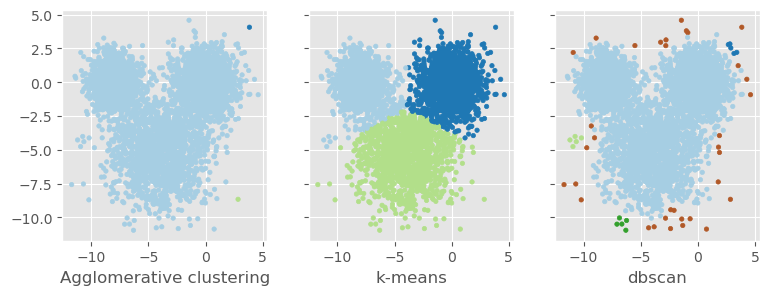

In [19]:


algs = ['Agglomerative clustering', 'k-means', 'dbscan']

def demo(dataset, metric='l2'):
  labels = normalize_and_give_cluster_labels(dataset, metric=metric)
  fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
  for i in range(3):
    plot_clustering(dataset, labels[i], axs[i], algs[i])

demo(dataset)

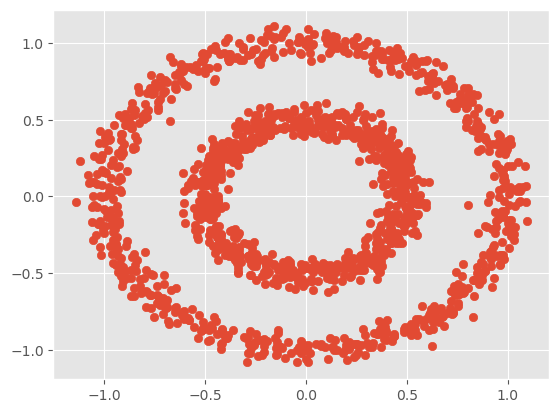

In [20]:
dataset, _ = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
plt.scatter(dataset[:,0 ], dataset[:,1])

/Users/herianhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/herianhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


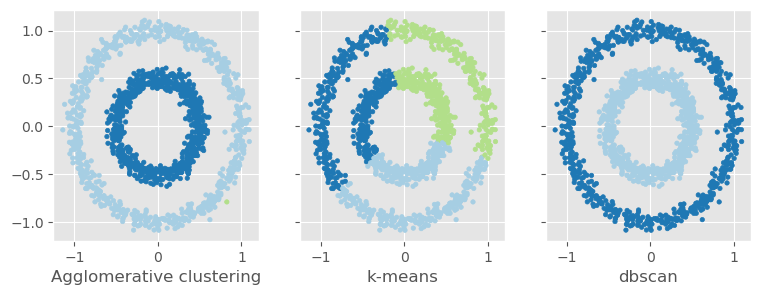

In [21]:
demo(dataset)

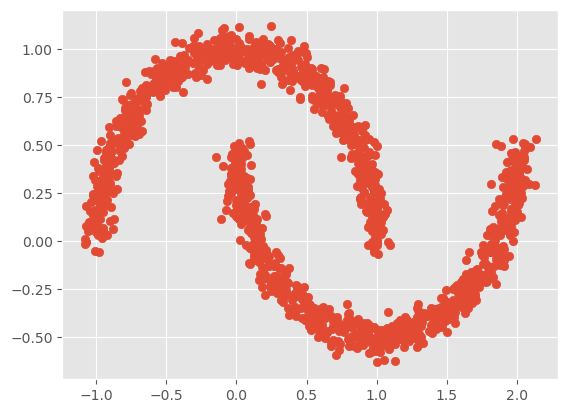

In [22]:
dataset, _ = datasets.make_moons(n_samples=n_samples, noise=0.05) 
plt.scatter(dataset[:,0 ], dataset[:,1])

/Users/herianhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/herianhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


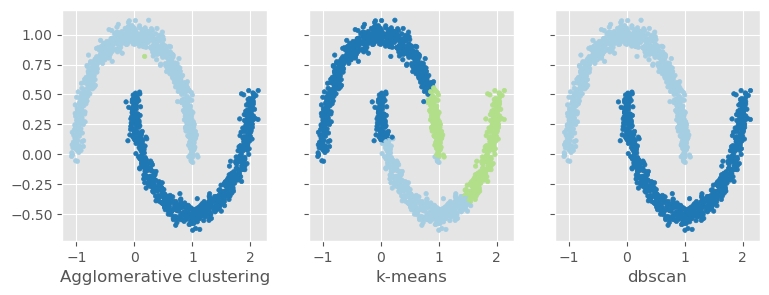

In [23]:
demo(dataset)

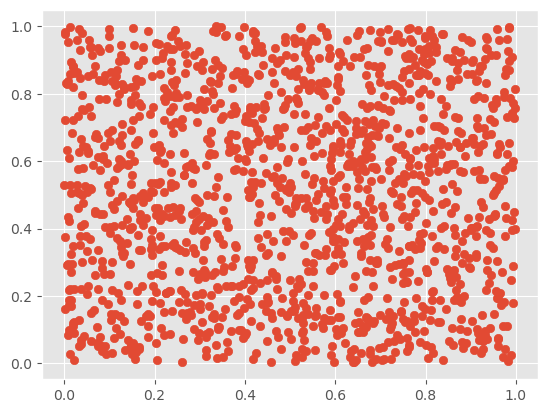

In [30]:
dataset, _ = np.random.rand(n_samples, 2), None
plt.scatter(dataset[:,0 ], dataset[:,1])

/Users/herianhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/herianhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


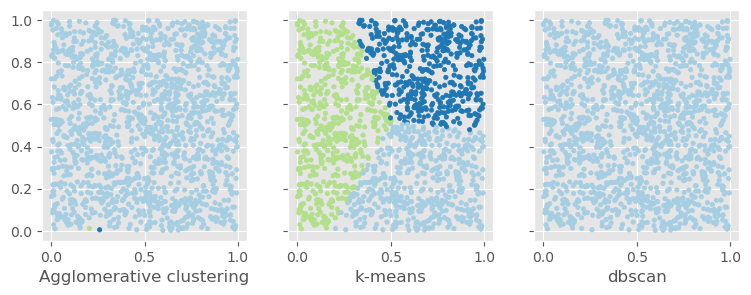

In [31]:
demo(dataset)

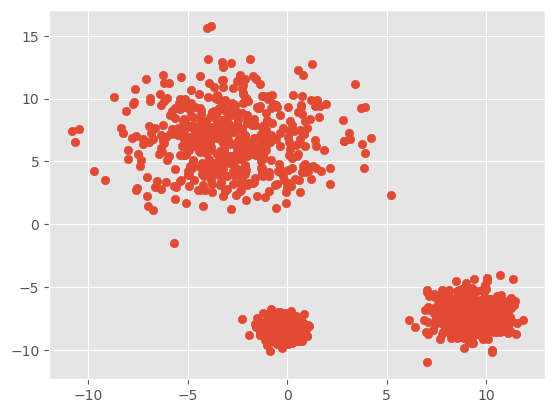

In [27]:
# blobs with varied variances
dataset, _ = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5])

plt.scatter(dataset[:,0], dataset[:,1])

/Users/herianhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/herianhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


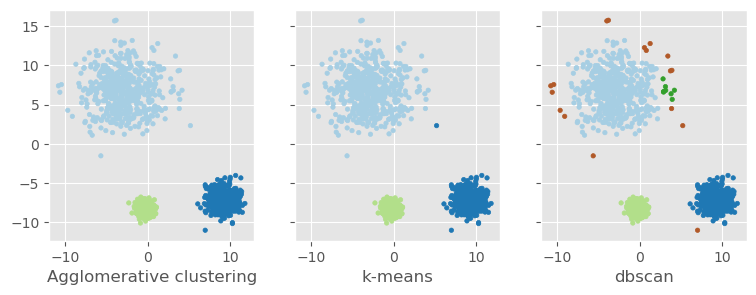

In [28]:
demo(dataset)

# Big question - how to validate clusters



1.   Compare with an existing labels. Is there high mutual information?
2.   Differential cluster labeling. Do results seem intuitive? ([MI and DCL](https://en.wikipedia.org/wiki/Cluster_labeling#Pointwise_mutual_information))
3. Can you use cluster labelings as features to predict other outcomes?
4. Are obvious outliers correctly excluded? Are obvious pairs of points within the same clusters?

